###### Steps for Classifcation Modelling

1. EDA
2. Feature Engineering
2. Divide data into X and Y (target)
3. Dummy Encoding
4. Split into train test
5. Feature Scaling
6. Initiate model(s)
7. Fit model
8. Predict Y with X_test
9. Calculate accuracy
10. Compare between models.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import train data first to inspect it

df = pd.read_csv('train.csv')
df.head()

,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes
0,316,2,112,68,22,94,34.1,0.315,26,0
1,25,11,143,94,33,146,36.6,0.254,51,1
2,710,2,93,64,32,160,38.0,0.674,23,1
3,658,1,120,80,48,200,38.9,1.162,41,0
4,542,3,128,72,25,190,32.4,0.549,27,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   p_id                   614 non-null    int64  
 1   no_times_pregnant      614 non-null    int64  
 2   glucose_concentration  614 non-null    int64  
 3   blood_pressure         614 non-null    int64  
 4   skin_fold_thickness    614 non-null    int64  
 5   serum_insulin          614 non-null    int64  
 6   bmi                    614 non-null    float64
 7   diabetes pedigree      614 non-null    float64
 8   age                    614 non-null    int64  
 9   diabetes               614 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 48.1 KB


There are no null values.

In [4]:
# Check any duplicates

df[df.duplicated()]

,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes


    No duplicate rows.

In [5]:
# Describe the statistical information of the numerical columns
df.describe()

,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,385.773616,3.853420,120.542345,68.765472,20.244300,79.355049,31.909935,0.466342,33.325733,0.348534
std,223.603024,3.358126,31.252286,19.914836,15.886083,117.709950,8.007699,0.331090,11.929569,0.476895
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,191.250000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.240250,24.000000,0.000000
50%,387.000000,3.000000,117.000000,72.000000,23.000000,17.000000,32.000000,0.361000,29.000000,0.000000
75%,572.750000,6.000000,139.000000,80.000000,32.000000,126.000000,36.600000,0.613500,41.000000,1.000000
max,768.000000,17.000000,197.000000,114.000000,63.000000,846.000000,59.400000,2.420000,81.000000,1.000000


There are error values for glucose concentration, blood pressure, skin fold thickness, serum insulin and bmi because it is unrealistic for these test results to be 0. 

Based on google research, diabetes pedigree is the probability of diabetes depending on the subject's age and his/her diabetic family history. Hence, the range of diabetes pedigree in the dataset is realistic.

For number of times pregnancy and age, ranges and values are realistic.

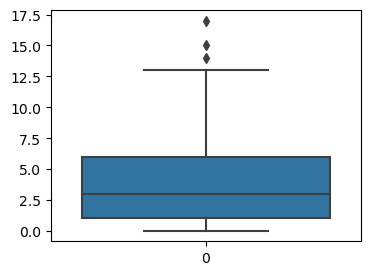

In [6]:
# checking for outliers with sns boxplots

plt.figure(figsize=(4, 3))
sns.boxplot(df['no_times_pregnant'])
plt.show()

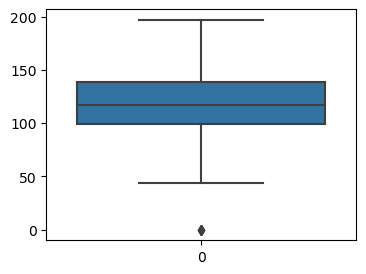

In [7]:
plt.figure(figsize=(4, 3))
sns.boxplot(df['glucose_concentration'])
plt.show()

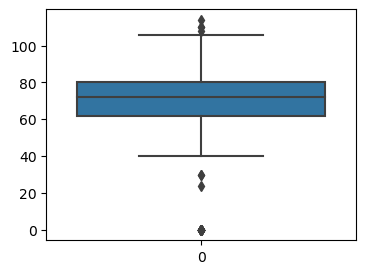

In [8]:
plt.figure(figsize=(4, 3))
sns.boxplot(df['blood_pressure'])
plt.show()

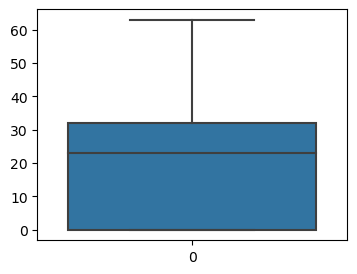

In [9]:
plt.figure(figsize=(4, 3))
sns.boxplot(df['skin_fold_thickness'])
plt.show()

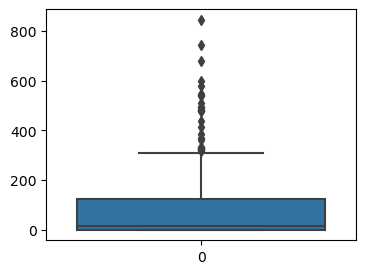

In [10]:
plt.figure(figsize=(4, 3))
sns.boxplot(df['serum_insulin'])
plt.show()

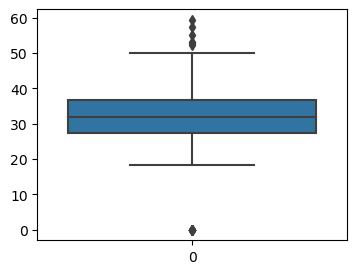

In [11]:
plt.figure(figsize=(4, 3))
sns.boxplot(df['bmi'])
plt.show()

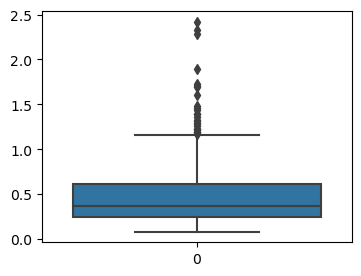

In [12]:
plt.figure(figsize=(4, 3))
sns.boxplot(df['diabetes pedigree'])
plt.show()

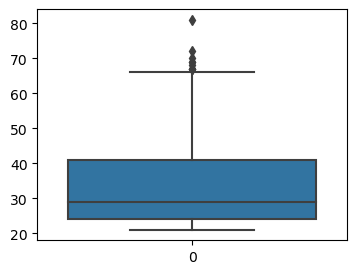

In [13]:
plt.figure(figsize=(4, 3))
sns.boxplot(df['age'])
plt.show()

Now, let's check entries with zero for glucose concentration.

In [14]:
df.loc[df['glucose_concentration'] == 0]

,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes
110,343,1,0,68,35,0,32.0,0.389,22,0
222,183,1,0,74,20,23,27.7,0.299,21,0
527,503,6,0,68,41,0,39.0,0.727,41,1
555,350,5,0,80,32,0,41.0,0.346,37,1


0 values has to be imputed with median since the distributions are skewed.

In [15]:
# impute 0 with median

df.loc[df['glucose_concentration'] == 0, 'glucose_concentration'] = np.median(df['glucose_concentration'])

In [16]:
# check df describe
df.describe()

,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,385.773616,3.853420,121.304560,68.765472,20.244300,79.355049,31.909935,0.466342,33.325733,0.348534
std,223.603024,3.358126,29.688213,19.914836,15.886083,117.709950,8.007699,0.331090,11.929569,0.476895
min,1.000000,0.000000,44.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,191.250000,1.000000,100.000000,62.000000,0.000000,0.000000,27.300000,0.240250,24.000000,0.000000
50%,387.000000,3.000000,117.000000,72.000000,23.000000,17.000000,32.000000,0.361000,29.000000,0.000000
75%,572.750000,6.000000,139.000000,80.000000,32.000000,126.000000,36.600000,0.613500,41.000000,1.000000
max,768.000000,17.000000,197.000000,114.000000,63.000000,846.000000,59.400000,2.420000,81.000000,1.000000


0 values successfully replaced with median.

Now repeat with blood pressure, skin fold thickness, serum insulin and bmi.

In [17]:
df.loc[df['blood_pressure'] == 0]

,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes
6,173,2,87,0,23,0,28.9,0.773,25,0
24,485,0,145,0,0,0,44.2,0.630,31,1
26,536,4,132,0,0,0,32.9,0.302,23,1
36,436,0,141,0,0,0,42.4,0.205,29,1
73,495,3,80,0,0,0,0.0,0.174,22,0
87,337,0,117,0,0,0,33.8,0.932,44,0
101,534,6,91,0,0,0,29.8,0.501,31,0
121,270,2,146,0,0,0,27.5,0.240,28,1
140,223,7,119,0,0,0,25.2,0.209,37,0
163,602,6,96,0,0,0,23.7,0.190,28,0


In [18]:
df.loc[df['blood_pressure'] == 0, 'blood_pressure'] = np.median(df['blood_pressure']) 
df.describe()

,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,385.773616,3.853420,121.304560,72.400651,20.244300,79.355049,31.909935,0.466342,33.325733,0.348534
std,223.603024,3.358126,29.688213,12.031595,15.886083,117.709950,8.007699,0.331090,11.929569,0.476895
min,1.000000,0.000000,44.000000,24.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,191.250000,1.000000,100.000000,64.000000,0.000000,0.000000,27.300000,0.240250,24.000000,0.000000
50%,387.000000,3.000000,117.000000,72.000000,23.000000,17.000000,32.000000,0.361000,29.000000,0.000000
75%,572.750000,6.000000,139.000000,80.000000,32.000000,126.000000,36.600000,0.613500,41.000000,1.000000
max,768.000000,17.000000,197.000000,114.000000,63.000000,846.000000,59.400000,2.420000,81.000000,1.000000


0 values for blood pressure has been replaced.

In [19]:
df.loc[df['skin_fold_thickness'] == 0]

,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes
5,152,4,114,65,0,0,21.9,0.432,37,0
14,251,9,106,52,0,0,31.2,0.380,42,0
15,34,6,92,92,0,0,19.9,0.188,28,0
17,85,5,137,108,0,0,48.8,0.227,37,1
19,304,5,115,98,0,0,52.9,0.209,28,1
...,...,...,...,...,...,...,...,...,...,...
591,236,4,171,72,0,0,43.6,0.479,26,1
600,247,10,122,68,0,0,31.2,0.258,41,0
605,37,11,138,76,0,0,33.2,0.420,35,0
611,730,2,92,52,0,0,30.1,0.141,22,0


In [20]:
df.loc[df['skin_fold_thickness'] == 0, 'skin_fold_thickness'] = np.median(df['skin_fold_thickness']) 
df.describe()

,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,385.773616,3.853420,121.304560,72.400651,27.249186,79.355049,31.909935,0.466342,33.325733,0.348534
std,223.603024,3.358126,29.688213,12.031595,8.972941,117.709950,8.007699,0.331090,11.929569,0.476895
min,1.000000,0.000000,44.000000,24.000000,7.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,191.250000,1.000000,100.000000,64.000000,23.000000,0.000000,27.300000,0.240250,24.000000,0.000000
50%,387.000000,3.000000,117.000000,72.000000,23.000000,17.000000,32.000000,0.361000,29.000000,0.000000
75%,572.750000,6.000000,139.000000,80.000000,32.000000,126.000000,36.600000,0.613500,41.000000,1.000000
max,768.000000,17.000000,197.000000,114.000000,63.000000,846.000000,59.400000,2.420000,81.000000,1.000000


In [21]:
df.loc[df['serum_insulin'] == 0]

,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes
5,152,4,114,65,23,0,21.9,0.432,37,0
6,173,2,87,72,23,0,28.9,0.773,25,0
11,400,3,193,70,31,0,34.9,0.241,25,1
12,48,2,71,70,27,0,28.0,0.586,22,0
13,147,9,57,80,37,0,32.8,0.096,41,0
...,...,...,...,...,...,...,...,...,...,...
606,358,13,129,72,30,0,39.9,0.569,44,1
608,81,3,113,44,13,0,22.4,0.140,22,0
611,730,2,92,52,23,0,30.1,0.141,22,0
612,103,0,125,96,23,0,22.5,0.262,21,0


In [22]:
df.loc[df['serum_insulin'] == 0, 'serum_insulin'] = np.median(df['serum_insulin']) 
df.describe()

,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,385.773616,3.853420,121.304560,72.400651,27.249186,87.771987,31.909935,0.466342,33.325733,0.348534
std,223.603024,3.358126,29.688213,12.031595,8.972941,112.204995,8.007699,0.331090,11.929569,0.476895
min,1.000000,0.000000,44.000000,24.000000,7.000000,14.000000,0.000000,0.078000,21.000000,0.000000
25%,191.250000,1.000000,100.000000,64.000000,23.000000,17.000000,27.300000,0.240250,24.000000,0.000000
50%,387.000000,3.000000,117.000000,72.000000,23.000000,17.500000,32.000000,0.361000,29.000000,0.000000
75%,572.750000,6.000000,139.000000,80.000000,32.000000,126.000000,36.600000,0.613500,41.000000,1.000000
max,768.000000,17.000000,197.000000,114.000000,63.000000,846.000000,59.400000,2.420000,81.000000,1.000000


In [23]:
df.loc[df['bmi'] == 0]

,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes
73,495,3,80,72,23,17,0.0,0.174,22,0
260,685,5,136,82,23,17,0.0,0.640,69,0
411,61,2,84,72,23,17,0.0,0.304,21,0
478,10,8,125,96,23,17,0.0,0.232,54,1
502,427,0,94,72,23,17,0.0,0.256,25,0
541,50,7,105,72,23,17,0.0,0.305,24,0
545,523,6,114,72,23,17,0.0,0.189,26,0
548,372,0,118,64,23,89,0.0,1.731,21,0
551,146,0,102,75,23,17,0.0,0.572,21,0
553,707,10,115,72,23,17,0.0,0.261,30,1


In [24]:
df.loc[df['bmi'] == 0, 'bmi'] = np.median(df['bmi']) 
df.describe()

,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,385.773616,3.853420,121.304560,72.400651,27.249186,87.771987,32.431107,0.466342,33.325733,0.348534
std,223.603024,3.358126,29.688213,12.031595,8.972941,112.204995,6.873171,0.331090,11.929569,0.476895
min,1.000000,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,191.250000,1.000000,100.000000,64.000000,23.000000,17.000000,27.500000,0.240250,24.000000,0.000000
50%,387.000000,3.000000,117.000000,72.000000,23.000000,17.500000,32.000000,0.361000,29.000000,0.000000
75%,572.750000,6.000000,139.000000,80.000000,32.000000,126.000000,36.600000,0.613500,41.000000,1.000000
max,768.000000,17.000000,197.000000,114.000000,63.000000,846.000000,59.400000,2.420000,81.000000,1.000000


Now, let's visualise the count of the target variable.

diabetes
0    400
1    214
Name: count, dtype: int64


/Users/macintoshhd/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/macintoshhd/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='diabetes', ylabel='count'>

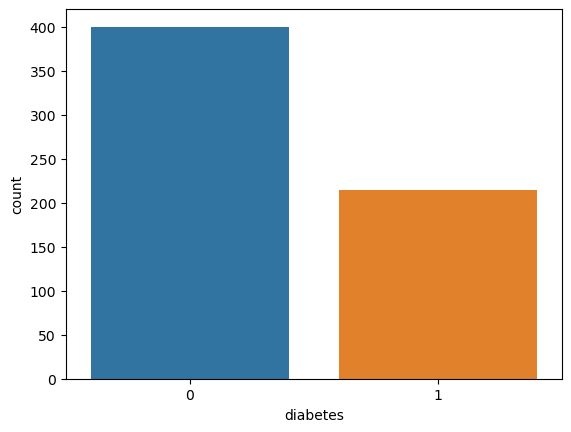

In [25]:
# distribution of target variable

print(df['diabetes'].value_counts())

sns.countplot(data=df, x='diabetes', order=df.diabetes.value_counts().index)

From the distribution, we can see that the number of diabetics are over half of the number of non-diabetics.

Let's see how the variable correlates with each other.

In [26]:
# correlation analysis

df.corr(method='pearson', numeric_only=True)

,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes
p_id,1.000000,-0.034607,-0.006199,0.051139,0.002281,0.010100,-0.017565,-0.052759,0.020156,-0.071237
no_times_pregnant,-0.034607,1.000000,0.125297,0.210925,0.041872,-0.083409,0.000799,-0.005811,0.534231,0.209196
glucose_concentration,-0.006199,0.125297,1.000000,0.249757,0.143654,0.345757,0.248275,0.136163,0.247687,0.502230
blood_pressure,0.051139,0.210925,0.249757,1.000000,0.156451,-0.046801,0.278936,-0.011878,0.320815,0.184592
skin_fold_thickness,0.002281,0.041872,0.143654,0.156451,1.000000,0.247138,0.574588,0.138157,0.034003,0.153129
serum_insulin,0.010100,-0.083409,0.345757,-0.046801,0.247138,1.000000,0.189718,0.172565,-0.038323,0.125933
bmi,-0.017565,0.000799,0.248275,0.278936,0.574588,0.189718,1.000000,0.135511,0.016473,0.297043
diabetes pedigree,-0.052759,-0.005811,0.136163,-0.011878,0.138157,0.172565,0.135511,1.000000,0.053637,0.173301
age,0.020156,0.534231,0.247687,0.320815,0.034003,-0.038323,0.016473,0.053637,1.000000,0.221736
diabetes,-0.071237,0.209196,0.502230,0.184592,0.153129,0.125933,0.297043,0.173301,0.221736,1.000000


<Axes: >

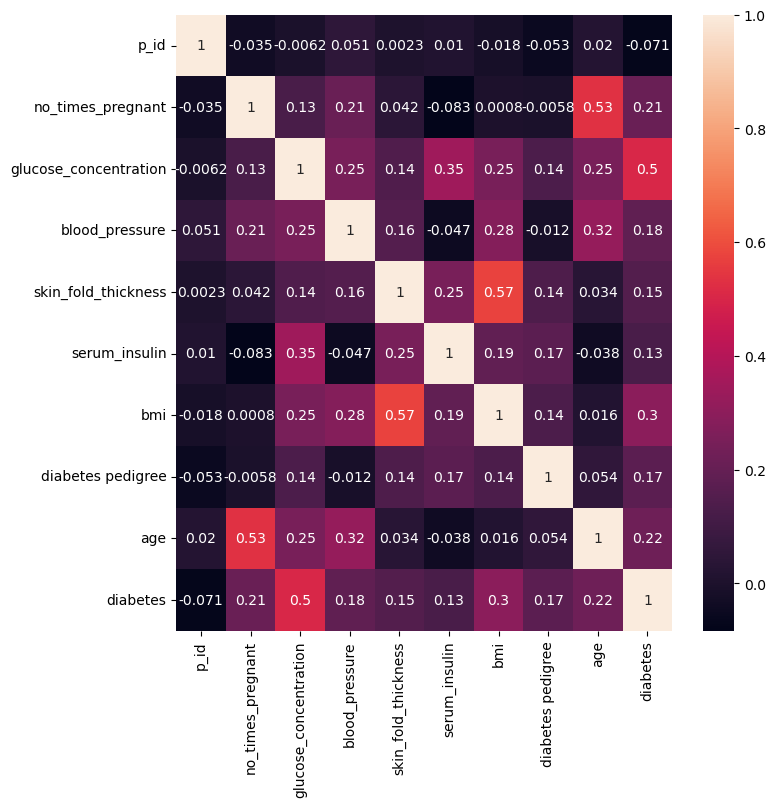

In [27]:
# visualise correlation with heatmaps

plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), annot=True)

1. The correlations between the variables and diabetes are mostly moderate.
2. The highest correlation between diabetes and a variable is glucose concentration at 0.5, which is still considered moderate.
3. The highest correlation from the heatmap is between skinfold thickness and BMI at 0.57, which is not surprising.
4. All negative correlations in the map are very weak, suggesting that the higher the values for the variables, the more likely you are to get diabetes.
5. For example, higher blood pressure and BMI are both associated with a higher likelihood of diabetes.
6. Overall, the table indicates that all the correlations are mostly moderate, and it implies that there may be variability and complexity of metabolic process at play.

In [32]:
# Feature engineering / binning

# for train data
# glucose concentration

labels = ['normal', 'pre_diabetes', 'diabetes']
bins = [0, 139, 199, 500]

df['glucose'] = pd.cut(df.glucose_concentration, bins, labels = labels, include_lowest=True)
df.head()

,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes,glucose
0,316,2,112,68,22,94,34.1,0.315,26,0,normal
1,25,11,143,94,33,146,36.6,0.254,51,1,pre_diabetes
2,710,2,93,64,32,160,38.0,0.674,23,1,normal
3,658,1,120,80,48,200,38.9,1.162,41,0,normal
4,542,3,128,72,25,190,32.4,0.549,27,1,normal


In [33]:
df.glucose.value_counts()

glucose
normal          463
pre_diabetes    151
diabetes          0
Name: count, dtype: int64

In [34]:
# BMI bins

labels = ['underweight', 'healthy', 'overweight', 'obese']
bins = [0, 18.4, 24.9, 29.9, 100]

df['bmi_cat'] = pd.cut(df.bmi, bins, labels = labels, include_lowest=True)
df.head()

,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes,glucose,bmi_cat
0,316,2,112,68,22,94,34.1,0.315,26,0,normal,obese
1,25,11,143,94,33,146,36.6,0.254,51,1,pre_diabetes,obese
2,710,2,93,64,32,160,38.0,0.674,23,1,normal,obese
3,658,1,120,80,48,200,38.9,1.162,41,0,normal,obese
4,542,3,128,72,25,190,32.4,0.549,27,1,normal,obese


In [35]:
# blood pressure bins

labels = ['low', 'normal', 'hypertension_I', 'hypertension_II']
bins = [0, 59, 80, 89, 200]

df['bp'] = pd.cut(df.blood_pressure, bins, labels = labels, include_lowest=True)
df.head()

,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes,glucose,bmi_cat,bp
0,316,2,112,68,22,94,34.1,0.315,26,0,normal,obese,normal
1,25,11,143,94,33,146,36.6,0.254,51,1,pre_diabetes,obese,hypertension_II
2,710,2,93,64,32,160,38.0,0.674,23,1,normal,obese,normal
3,658,1,120,80,48,200,38.9,1.162,41,0,normal,obese,normal
4,542,3,128,72,25,190,32.4,0.549,27,1,normal,obese,normal


In [36]:
# dummy encoding

df = pd.get_dummies(df, drop_first=True, dtype=int)
df.head()

,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes,glucose_pre_diabetes,glucose_diabetes,bmi_cat_healthy,bmi_cat_overweight,bmi_cat_obese,bp_normal,bp_hypertension_I,bp_hypertension_II
0,316,2,112,68,22,94,34.1,0.315,26,0,0,0,0,0,1,1,0,0
1,25,11,143,94,33,146,36.6,0.254,51,1,1,0,0,0,1,0,0,1
2,710,2,93,64,32,160,38.0,0.674,23,1,0,0,0,0,1,1,0,0
3,658,1,120,80,48,200,38.9,1.162,41,0,0,0,0,0,1,1,0,0
4,542,3,128,72,25,190,32.4,0.549,27,1,0,0,0,0,1,1,0,0


Next, divide data into X and Y.

In [41]:
X = df.drop(columns=['p_id','diabetes'], axis=1)
Y = df.diabetes.values

In [42]:
X

,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,glucose_pre_diabetes,glucose_diabetes,bmi_cat_healthy,bmi_cat_overweight,bmi_cat_obese,bp_normal,bp_hypertension_I,bp_hypertension_II
0,2,112,68,22,94,34.1,0.315,26,0,0,0,0,1,1,0,0
1,11,143,94,33,146,36.6,0.254,51,1,0,0,0,1,0,0,1
2,2,93,64,32,160,38.0,0.674,23,0,0,0,0,1,1,0,0
3,1,120,80,48,200,38.9,1.162,41,0,0,0,0,1,1,0,0
4,3,128,72,25,190,32.4,0.549,27,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,189,60,23,846,30.1,0.398,59,1,0,0,0,1,1,0,0
610,1,84,64,23,115,36.9,0.471,28,0,0,0,0,1,1,0,0
611,2,92,52,23,17,30.1,0.141,22,0,0,0,0,1,0,0,0
612,0,125,96,23,17,22.5,0.262,21,0,0,1,0,0,0,0,1


In [43]:
Y

array([0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,

In [44]:
# Split into train and test data

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25)

In [45]:
# Feature Scaling with StandardScaler()

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [46]:
X_train_sc

array([[ 0.07457534, -1.04736895, -0.20903689, ...,  0.70941382,
        -0.40928314, -0.30007898],
       [ 0.07457534, -0.16633557, -0.86990954, ...,  0.70941382,
        -0.40928314, -0.30007898],
       [-0.83616775,  1.9684761 , -0.04381873, ...,  0.70941382,
        -0.40928314, -0.30007898],
       ...,
       [-1.13974879, -0.91182535,  0.61705392, ...,  0.70941382,
        -0.40928314, -0.30007898],
       [ 0.98531844,  0.47749652,  1.44314472, ..., -1.40961448,
        -0.40928314,  3.33245602],
       [-1.13974879, -1.65731514, -0.04381873, ...,  0.70941382,
        -0.40928314, -0.30007898]])

In [47]:
X_test_sc

array([[-0.53258672, -0.33576506,  1.1127084 , ..., -1.40961448,
         2.44329633, -0.30007898],
       [ 0.37815637, -0.43742276,  0.20400851, ...,  0.70941382,
        -0.40928314, -0.30007898],
       [ 0.98531844,  0.68081192, -1.0351277 , ...,  0.70941382,
        -0.40928314, -0.30007898],
       ...,
       [-0.53258672,  0.20640933, -0.70469137, ...,  0.70941382,
        -0.40928314, -0.30007898],
       [-0.83616775, -1.25068435, -0.53947321, ...,  0.70941382,
        -0.40928314, -0.30007898],
       [ 0.07457534, -1.28457025,  1.44314472, ..., -1.40961448,
        -0.40928314,  3.33245602]])

In [48]:
# initiate KNN model

from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()

model.fit(X_train_sc, Y_train)

KNeighborsClassifier()

In [49]:
Y_pred = model.predict(X_test_sc)

In [50]:
Y_pred

array([0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0])

In [51]:
Y_test

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0])

In [52]:
# check accuracy

from sklearn.metrics import accuracy_score

print(accuracy_score(Y_test,Y_pred)*100)

75.97402597402598


For KNN, the model accuracy is 75.97%

In [53]:
# initiate decision tree model

from sklearn.tree import DecisionTreeClassifier

model_tree = DecisionTreeClassifier()

model_tree.fit(X_train_sc, Y_train)

DecisionTreeClassifier()

In [54]:
Y_pred = model_tree.predict(X_test_sc)

In [55]:
Y_pred

array([0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0])

In [56]:
Y_test

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0])

In [57]:
# check accuracy

print(accuracy_score(Y_test,Y_pred)*100)

70.12987012987013


Decision Tree model accuracy is 70%

In [69]:
# initiate random forest model

from sklearn.ensemble import RandomForestClassifier

model_forest = RandomForestClassifier()

model_forest.fit(X_train_sc, Y_train)

RandomForestClassifier()

In [70]:
Y_pred = model_forest.predict(X_test_sc)

In [71]:
Y_pred

array([0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0])

In [72]:
Y_test

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0])

In [73]:
# check accuracy

print(accuracy_score(Y_test,Y_pred)*100)

75.32467532467533


Random Forest model accuracy with default n_estimators is 75.32%

In [74]:
# with n_estimators=150

model_forest_150 = RandomForestClassifier(n_estimators=150)

model_forest_150.fit(X_train_sc, Y_train)

RandomForestClassifier(n_estimators=150)

In [76]:
Y_pred = model_forest_150.predict(X_test_sc)
print(accuracy_score(Y_test,Y_pred)*100)

77.27272727272727


In [77]:
# with n_estimators=200

model_forest_200 = RandomForestClassifier(n_estimators=200)

model_forest_200.fit(X_train_sc, Y_train)

RandomForestClassifier(n_estimators=200)

In [78]:
Y_pred = model_forest_200.predict(X_test_sc)
print(accuracy_score(Y_test,Y_pred)*100)

78.57142857142857


In [79]:
# with n_estimators=250

model_forest_250 = RandomForestClassifier(n_estimators=250)

model_forest_250.fit(X_train_sc, Y_train)

RandomForestClassifier(n_estimators=250)

In [80]:
Y_pred = model_forest_250.predict(X_test_sc)
print(accuracy_score(Y_test,Y_pred)*100)

77.27272727272727


These are list of models and their respective accuracy scores.

1. KNN = 76%
2. Decision Tree = 70%
3. Random Forest (default) = 75%
4. Random Forest (150) = 77%
5. Random Forest (200) = 79%
6. Random Forest (250) = 77%

###### Therefore, model with highest accuracy goes to Random Forest (200).